In [60]:
!pip install pandas

You should consider upgrading via the '/opt/sagemath-9.2/local/bin/python3 -m pip install --upgrade pip' command.


In [61]:
import numpy as np
import pandas as pd
%display typeset

Calculando dX/dt:

In [4]:
var('X mu D t')
X = function('X')(t)
dxdt = diff(X,t) == mu*X-D*X
dxdt

diff(X(t), t) == -D*X(t) + mu*X(t)

Calculando dS/dt:

In [5]:
var('S mu D Sf X Y t')
S = function('S')(t)
dsdt = diff(S,t) == D*Sf - D*S -(mu*X/Y)
dsdt

diff(S(t), t) == D*Sf - D*S(t) - X*mu/Y

Desenvolvendo a matriz jacobiana:

In [6]:
var('S X mu D Y Sf x s')
J = jacobian([mu*x-D*x, D*Sf - D*s -(mu*x/Y)],[x,s])
J

[-D + mu       0]
[  -mu/Y      -D]

Calculando o traço (p):

In [7]:
J.trace()

-2*D + mu

Calculando o determinante (q):

In [8]:
J.det()

(D - mu)*D

Autovalores:

In [9]:
J.eigenvalues()

[-D + mu, -D]

In [10]:
max(J.eigenvalues())

-D + mu

Os autovalores são reais e distintos, já que mu > 0 (mu é taxa de crescimento específica; 1/Tempo): 

Se mu>D, os sinais dos autovalores são opostos: Equilíbrio em ponto de sela

Se mu<D, os sinais dos autovalores são iguais, nesse caso negativos, já que D é taxa de diluição e portanto não pode ser negativo: Equilíbrio pontual estável

Se mu=D, um dos autovalores será 0:.....?

Note que mu-D será sempre maior que -D, logo mu-D será o autovalor dominante $(\lambda_d)$

Polinômio característico:

In [11]:
J.characteristic_polynomial()

x^2 + (2*D - mu)*x + D^2 - D*mu

In [12]:
p = J.trace
print(p)

q = J.det
print(q)

<built-in method trace of sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense object at 0x6ffed0ad0bd0>
<built-in method det of sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense object at 0x6ffed0ad0bd0>


p = -2D+mu

q = D^2 - muD

Δ=p^2-4*q

p^2 = (mu-2D)^2 = mu^2 -4muD +4D^2

4q = 4(D^2 - muD) = 4D^2 - 4muD

Δ = mu^2 -4muD +4D^2 - (4D^2 - 4muD) = mu^2

Calculando o equilíbrio pontual do sistema:

In [13]:
var('S X mu D Y Sf x s')
xdot(x,s) = mu*x-D*x
sdot(x,s) = D*Sf - D*s -(mu*x/Y)
solve([xdot, sdot], [x,s])

[[x == 0, s == Sf]]

In [54]:
dxdt = mu*X-D*X
dsdt = diff(S,t) == D*Sf - D*S -(mu*X/Y)

solve([xdot, sdot], [x,s])

[[x == 0, s == Sf]]

*-----------------------------------------------------------------------------------------------------*

'Raízes=' [x == 0]

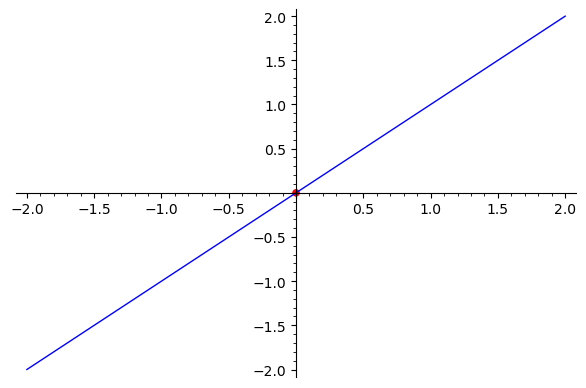

In [14]:
var('mu D')
f(x) = mu*x - D*x
raízes = solve(f,x)
show("Raízes=",raízes)
F=plot(f(mu=2, D=1),(x,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

In [15]:
@interact
def linear(mu=(-2,2,1),D=(-1,1,1)):
    P = plot(f(mu=mu, D=D), (x,-1.5,1.5))
    raízes = solve(f,x)
    show("Raízes=",raízes)
    P2=points([(0,0)], pointsize=30, color='red')
    show(P+P2)

Interactive function <function linear at 0x6ffecad7a320> with 2 widgets
  mu: IntSlider(value=0, description='mu', max=2, min=-2)
  D: IntSlider(value=0, description='D', max=1, min=-1)

In [16]:
var('x s mu D Sf X S mumax Ks')

mu==mumax*s/(Ks + s)

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D - mu)*t),
 S(t) == Sf - (Sf*Y - 500)*e^(-D*t)/Y - 500*e^(-(D - mu)*t)/Y]

Legenda: 


Azul==X (Concentração celular)

Verde==S (Concentração de substrato)

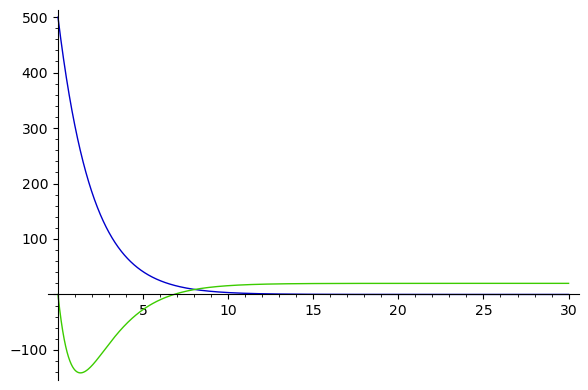

In [17]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.8, Sf=20),solS(mu=0.5, D=1, Y=0.8, Sf=20)),(t,0,30))

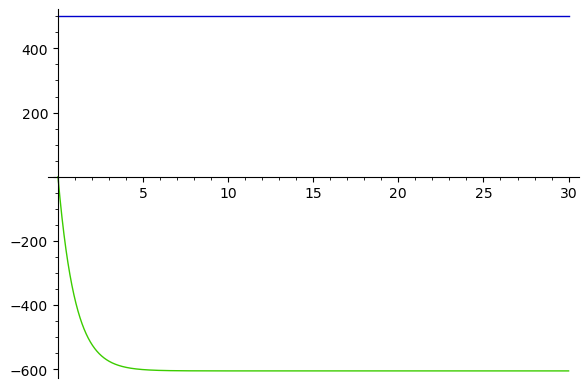

In [18]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=0.8, Sf=20),solS(mu=1, D=1, Y=0.8, Sf=20)),(t,0,30))

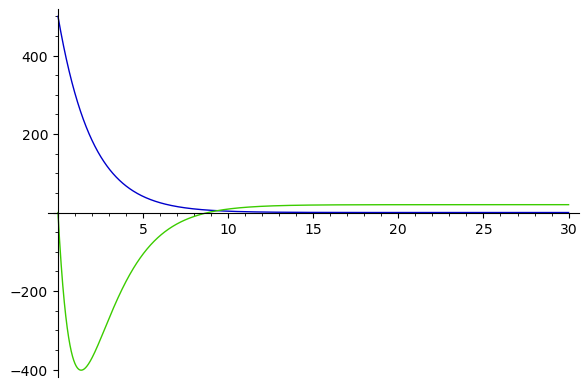

In [19]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.3, Sf=20),solS(mu=0.5, D=1, Y=0.3, Sf=20)),(t,0,30))

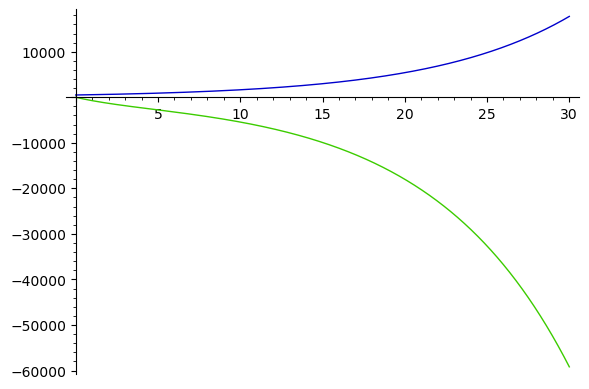

In [20]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.381, Y=0.3, Sf=1),solS(mu=0.5, D=0.381, Y=0.3, Sf=1)),(t,0,30))

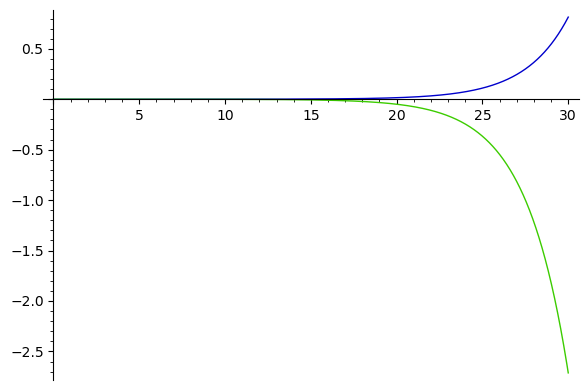

In [21]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.1, Y=0.3, Sf=1),solS(mu=0.5, D=0.1, Y=0.3, Sf=1)),(t,0,30))

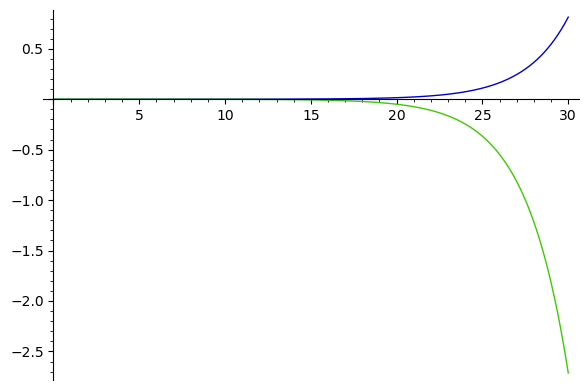

In [22]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=0.1, Y=0.3, Sf=10),solS(mu=0.5, D=0.1, Y=0.3, Sf=10)),(t,0,30))

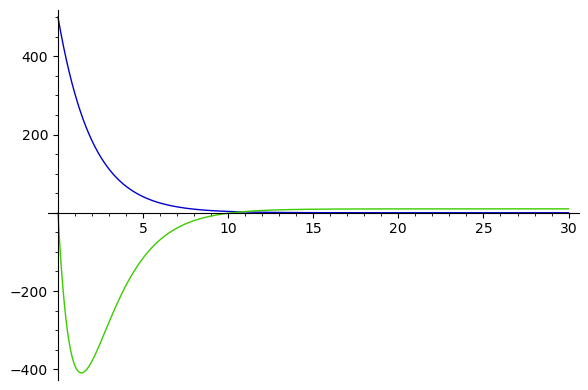

In [23]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.5, D=1, Y=0.3, Sf=10),solS(mu=0.5, D=1, Y=0.3, Sf=10)),(t,0,30))

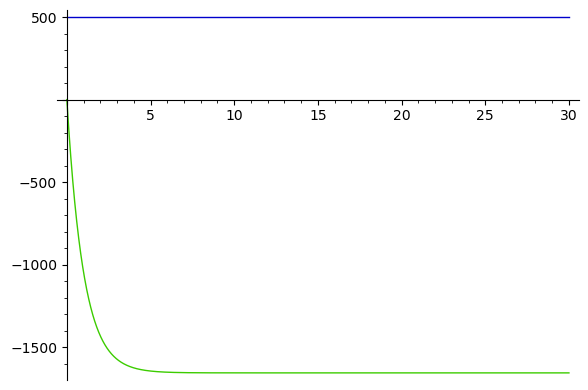

In [24]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=0.3, Sf=10),solS(mu=1, D=1, Y=0.3, Sf=10)),(t,0,30))

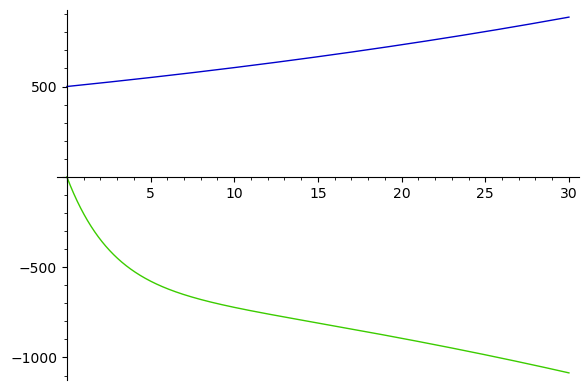

In [25]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.4, D=0.381, Y=0.8, Sf=20),solS(mu=0.4, D=0.381, Y=0.8, Sf=20)),(t,0,30))

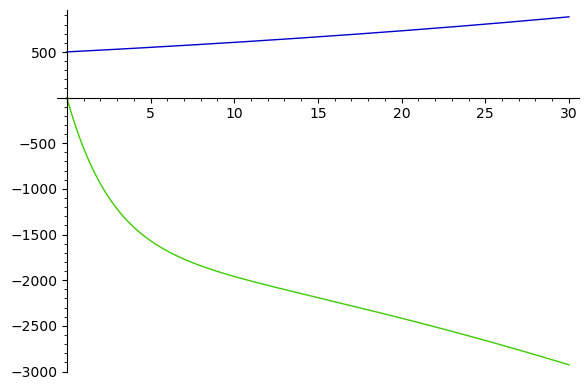

In [26]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.4, D=0.381, Y=0.3, Sf=20),solS(mu=0.4, D=0.381, Y=0.3, Sf=20)),(t,0,30))

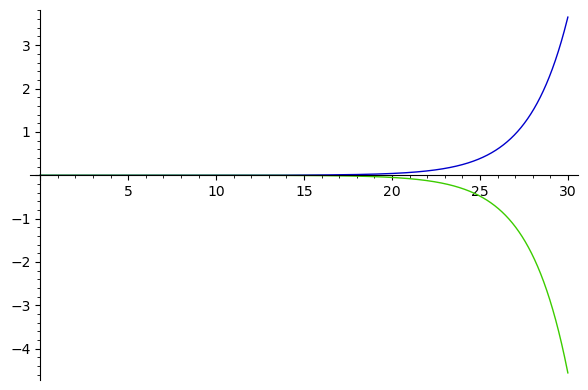

In [27]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1.45, D=1, Y=0.8, Sf=20),solS(mu=1.45, D=1, Y=0.8, Sf=20)),(t,0,30))

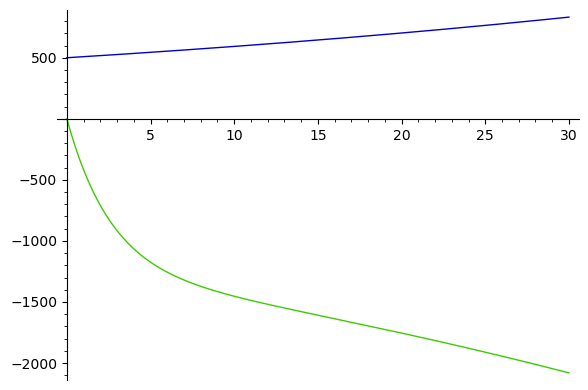

In [28]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=0.398, D=0.381, Y=0.4, Sf=1),solS(mu=0.398, D=0.381, Y=0.4, Sf=1)),(t,0,30))

'Raízes=' [s == (D*Sf*Y - X*mu)/(D*Y)]

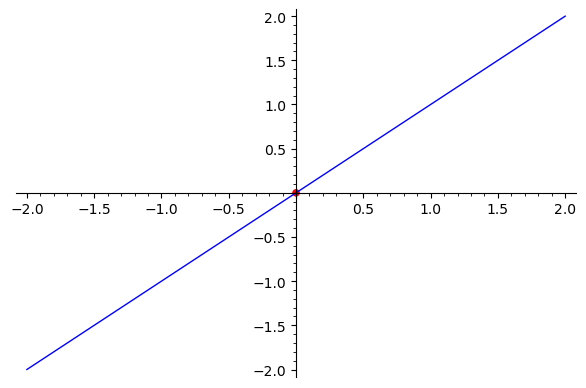

In [29]:
var('mu D Sf X Y')
f(s) = D*Sf - D*s -(mu*X/Y)
raízes = solve(f,s)
show("Raízes=",raízes)
F=plot(s(mu=2, D=1, Sf=20, X=0, Y=0.8),(s,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

'Raízes=' [s == (D*Sf*Y - mu*x)/(D*Y)]

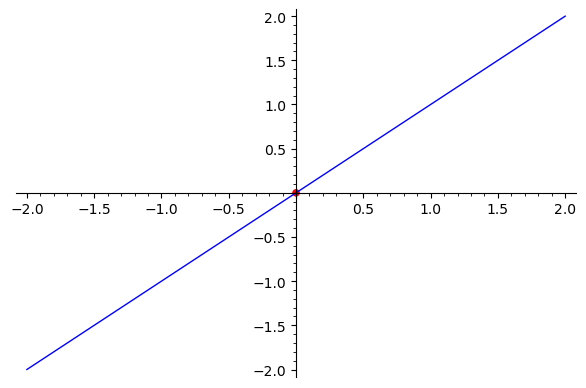

In [30]:
var('mu D Sf Y')
f(s) = D*Sf - D*s -(mu*x/Y)
raízes = solve(f,s)
show("Raízes=",raízes)
F=plot(s(mu=2, D=1, Sf=20, X=0, Y=0.8),(s,-2,2))
P=points([(0,0)], pointsize=30, color='red')
F+P

In [31]:
def fun(t,y):
    x,s = y
    return [Y*(Sf-(Ks*D)/(mumax-D)),
            Ks*D/(mumax-D)]

In [32]:
'''T = ode_solver()
T.algorithm='rk8pd'
T.function = fun
y0=[1,0]
T.ode_solve(t_span=[0,10],y_0=y0, num_points=100)'''

#Verificar como resolver esse problema depois

"T = ode_solver()\nT.algorithm='rk8pd'\nT.function = fun\ny0=[1,0]\nT.ode_solve(t_span=[0,10],y_0=y0, num_points=100)"

In [34]:
var('t x s mu D Sf X Y mumax Ks')

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D - mu)*t),
 S(t) == Sf - (Sf*Y - 500)*e^(-D*t)/Y - 500*e^(-(D - mu)*t)/Y]

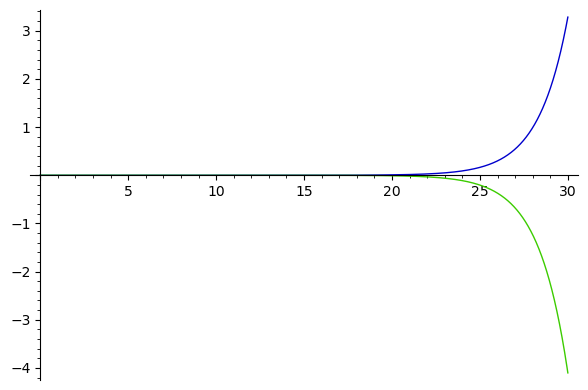

In [35]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1.6, Ks= 1, D=1, Y=0.8, Sf=20),solS(mu=1.6, Ks= 1, D=1, Y=0.8, Sf=20)),(t,0,30))

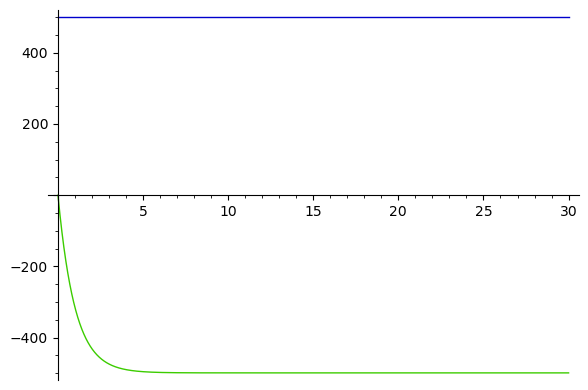

In [36]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=1, Sf=1),solS(mu=1, D=1, Y=1, Sf=1)),(t,0,30))

*-----------------------------------------------------------------------------------------------------*

As equações de soluções de estado estacionário são as seguintes:

S = KsD/(mumax-D)

X = Y(Sf- KsD/(mumax-D))

mu = mumax.S/(Ks+S)

In [37]:
mumax = 1.6
Ks = 1
Y = 0.8
Sf = 20
D = 1

In [38]:
S = Ks*D/(mumax-D)
print(S)

1.66666666666667


In [39]:
X = Y*(Sf- Ks*D/(mumax-D))
print(X)

14.6666666666667


In [40]:
mu = mumax*S/(Ks+S)
print(mu)

1.00000000000000


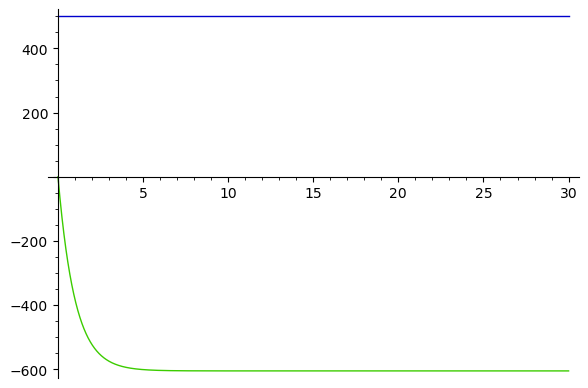

In [41]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mu=1, D=1, Y=0.8, Sf=20),solS(mu=1, D=1, Y=0.8, Sf=20)),(t,0,30))

In [42]:
var('x s mu D Sf X S mumax Ks')

mu=mumax*S/(Ks + S)

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,500,0], ivar=t)
show(sol)

[X(t) == 500*e^(-(D*Ks + D*S - S*mumax)*t/(Ks + S)),
 S(t) == -(Sf - 625)*e^(-D*t) + Sf - 625*e^(-(D*Ks + D*S - S*mumax)*t/(Ks + S))]

In [43]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mumax=1.6, Ks= 1, D=1, Y=0.8, Sf=20),solS(mumax=1.6, Ks= 1, D=1, Y=0.8, Sf=20)),(t,0,30))

ValueError: Variable 'S' not found

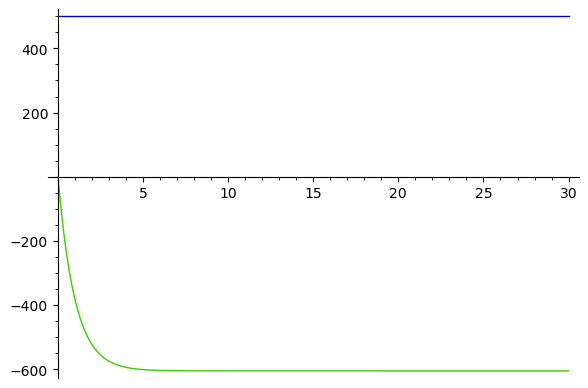

In [47]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mumax=1.6, Ks= 1, D=1, Y=0.8, Sf=20, S=1.66666666666667),solS(mumax=1.6, Ks= 1, D=1, Y=0.8, Sf=20, S=1.66666666666667)),(t,0,30))

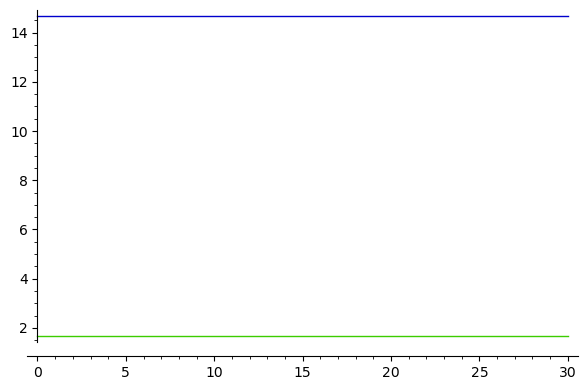

In [50]:
mumax=1.6
Ks= 1
D=1
Y=0.8
Sf=20
S=1.66666666666667

plot((Y*(Sf- Ks*D/(mumax-D)), Ks*D/(mumax-D)),(t,0,30))

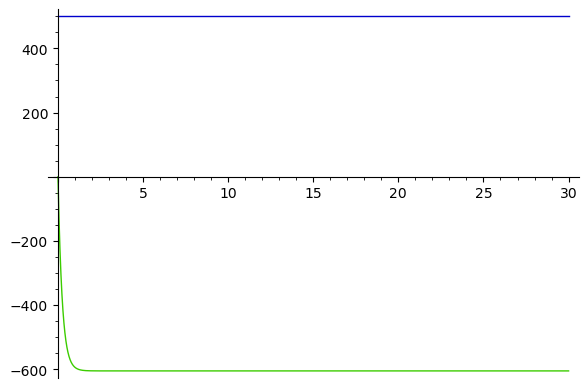

In [51]:
# Atribuindo  valores para as taxas de conversão:
solX, solS = sol[0].rhs(), sol[1].rhs()
plot((solX(mumax=6, Ks= 1, D=4, Y=0.8, Sf=20, S=2),solS(mumax=6, Ks= 1, D=4, Y=0.8, Sf=20, S=2)),(t,0,30))

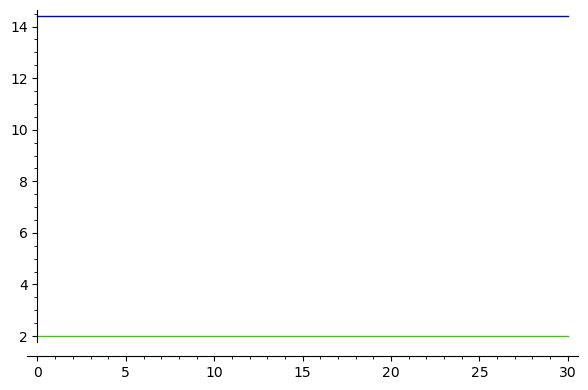

In [52]:
mumax=6
Ks= 1
D=4
Y=0.8
Sf=20
S=2

plot((Y*(Sf- Ks*D/(mumax-D)), Ks*D/(mumax-D)),(t,0,30))

Simulação:

In [64]:
import numpy as np
import pandas as pd
%display typeset

In [68]:
def model(t, y, params):
    X, S = y
    mu, D, Sf, Y, mumax, Ks = params
    return [
        mu*X - D*X, #dX/dt
        D*Sf - D*S -(mu*X/Y) # dS/dt
    ]

In [69]:
mumax=6
Ks= 1
D=4
Y=0.8
Sf=20
mu = mumax*S/(Ks+S)

In [75]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [0.05, 10]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [76]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 0.05      , 10.        ],
       [ 0.05      , 18.59260562],
       [ 0.05      , 19.75548834],
       [ 0.05      , 19.9128674 ],
       [ 0.05      , 19.93416634],
       [ 0.05      , 19.93704884],
       [ 0.05      , 19.93743894],
       [ 0.05      , 19.93749174],
       [ 0.05      , 19.93749888],
       [ 0.05      , 19.93749985],
       [ 0.05      , 19.93749998],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0.05      , 19.9375    ],
       [ 0

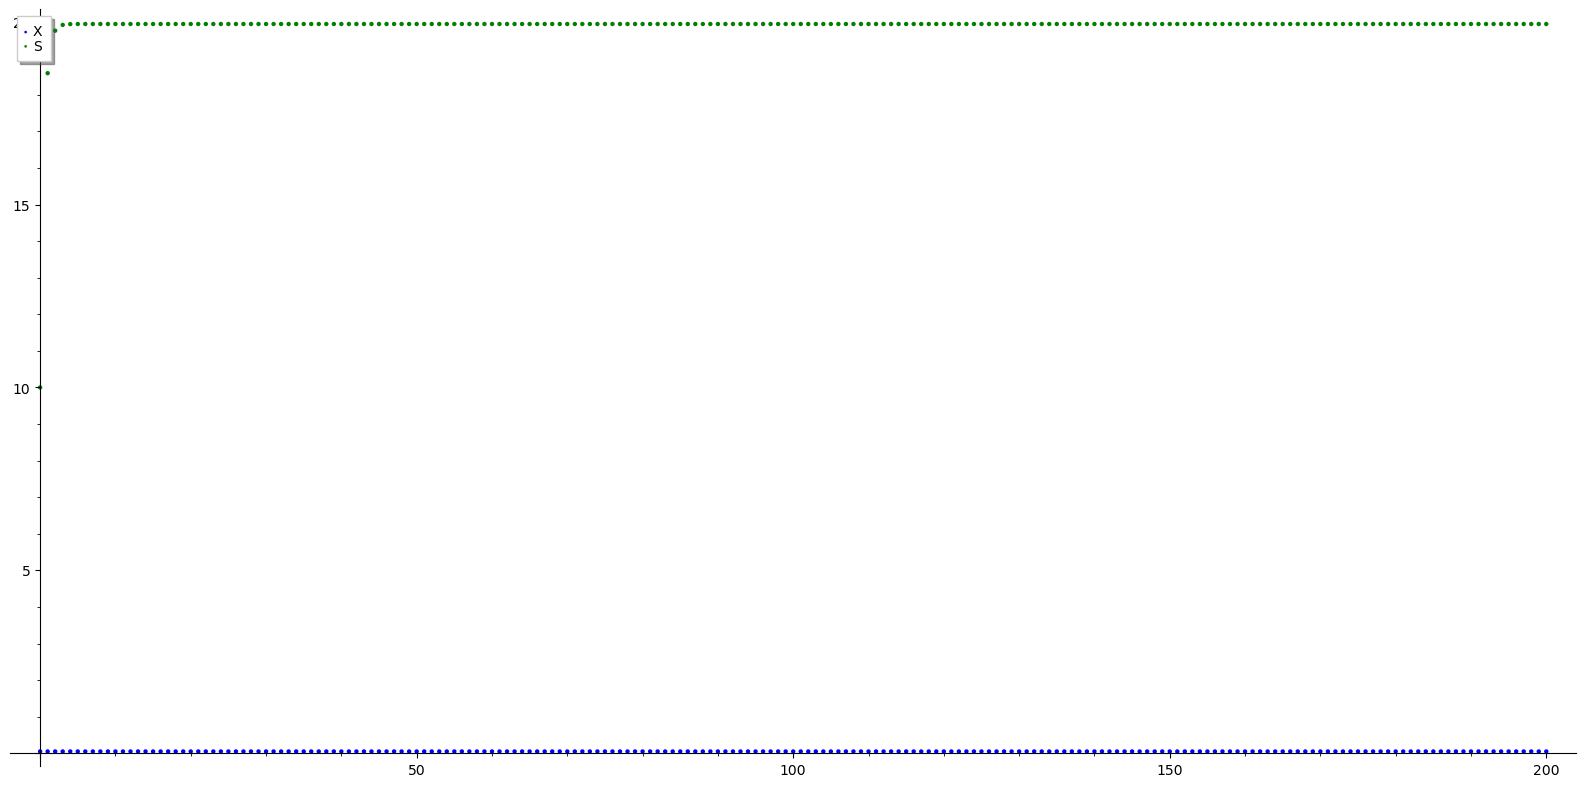

In [77]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

In [72]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [14.6666666666667, 1.66666666666667]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [73]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14.66666667,  1.66666667],
       [14

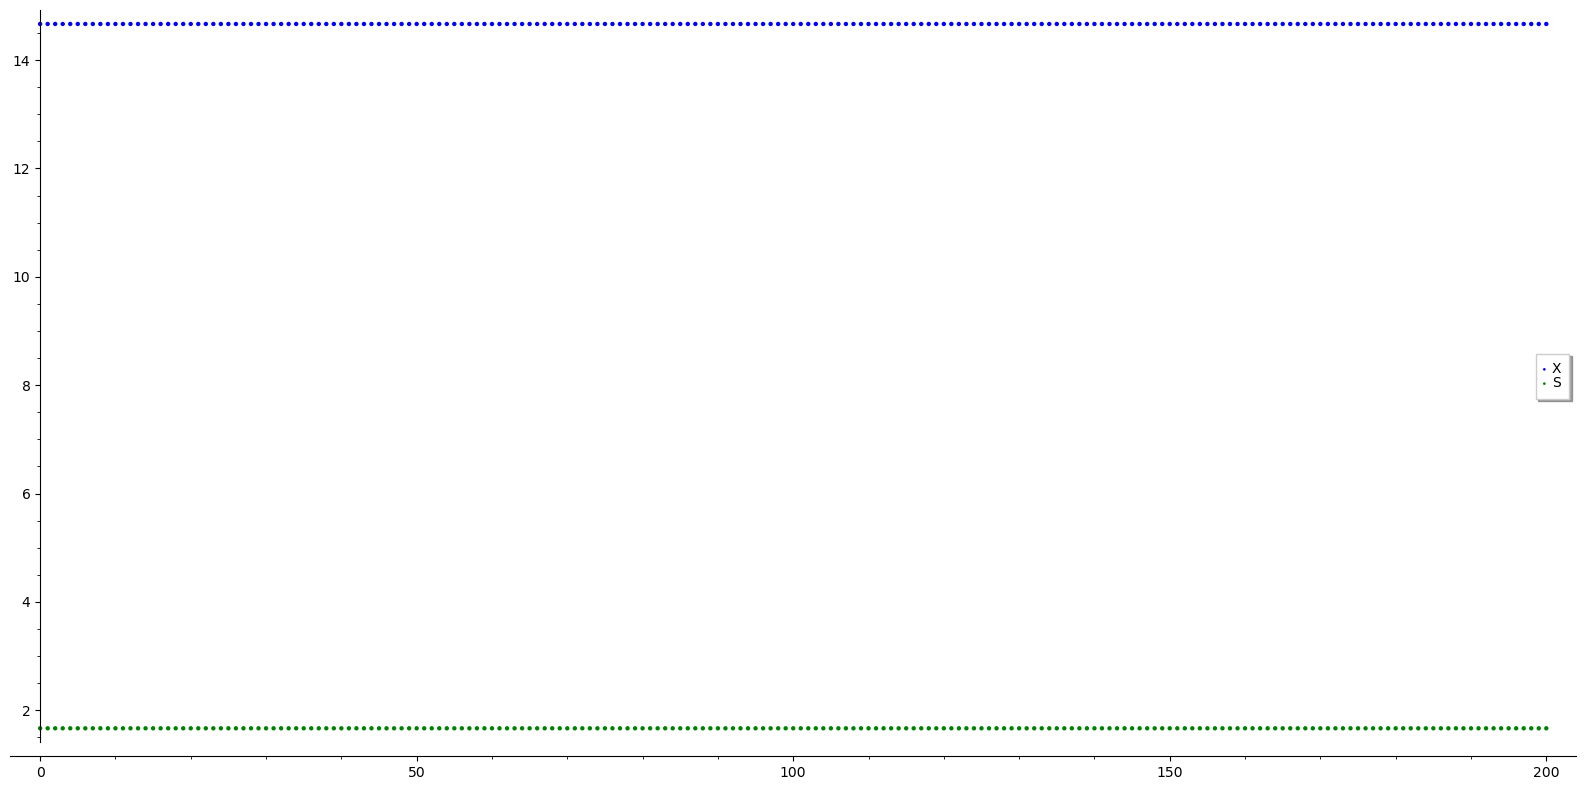

In [74]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)

In [78]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [1, 1]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [79]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 1.        ,  1.        ],
       [ 1.        , 16.34779872],
       [ 1.        , 18.42489741],
       [ 1.        , 18.70600215],
       [ 1.        , 18.74404554],
       [ 1.        , 18.74919415],
       [ 1.        , 18.74989094],
       [ 1.        , 18.74998524],
       [ 1.        , 18.749998  ],
       [ 1.        , 18.74999973],
       [ 1.        , 18.74999996],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1.        , 18.75      ],
       [ 1

**Observação: a concentração de células (X) não evolui porque, no cálculo acima, mu=D, e consequentemente X não irá evoluir

In [80]:
mumax = 1.6   
Ks = 1.00     
Y = 0.8     
Sf = 20.0    
D = 1.00
mu = mumax*S/(Ks+S)

In [81]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [0.05, 10]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=200, params=[mu, D, Sf, Y, mumax, Ks])

In [82]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 5.00000000e-02,  1.00000000e+01],
       [ 5.16947557e-02,  1.39079831e+01],
       [ 5.34469553e-02,  1.62773894e+01],
       [ 5.52585459e-02,  1.77135709e+01],
       [ 5.71315406e-02,  1.85836912e+01],
       [ 5.90680206e-02,  1.91104453e+01],
       [ 6.10701379e-02,  1.94289033e+01],
       [ 6.31401172e-02,  1.96209884e+01],
       [ 6.52802586e-02,  1.97363880e+01],
       [ 6.74929404e-02,  1.98052382e+01],
       [ 6.97806213e-02,  1.98458159e+01],
       [ 7.21458433e-02,  1.98692054e+01],
       [ 7.45912349e-02,  1.98821284e+01],
       [ 7.71195133e-02,  1.98886602e+01],
       [ 7.97334879e-02,  1.98912713e+01],
       [ 8.24360635e-02,  1.98914586e+01],
       [ 8.52302433e-02,  1.98901285e+01],
       [ 8.81191320e-02,  1.98878291e+01],
       [ 9.11059400e-02,  1.98848912e+01],
       [ 9.41939862e-02,  1.98815137e+01],
       [ 9.73867021e-02,  1.98778155e+01],
       [ 1.00687635e-01,  1.98738668e+01],
       [ 1.04100454e-01,  1.98697085e+01],
       [ 1.07628951e-01,  1.98653631e+01],
       [ 1.11277046e-01,  1.98608426e+01],
       [ 1.15048795e-01,  1.98561520e+01],
       [ 1.18948386e-01,  1.98512921e+01],
       [ 1.22980156e-01,  1.98462612e+01],
       [ 1.27148582e-01,  1.98410560e+01],
       [ 1.31458298e-01,  1.98356721e+01],
       [ 1.35914091e-01,  1.98301043e+01],
       [ 1.40520915e-01,  1.98243470e+01],
       [ 1.45283887e-01,  1.98183940e+01],
       [ 1.50208301e-01,  1.98122389e+01],
       [ 1.55299629e-01,  1.98058751e+01],
       [ 1.60563527e-01,  1.97992953e+01],
       [ 1.66005846e-01,  1.97924925e+01],
       [ 1.71632633e-01,  1.97854591e+01],
       [ 1.77450141e-01,  1.97781873e+01],
       [ 1.83464833e-01,  1.97706689e+01],
       [ 1.89683395e-01,  1.97628957e+01],
       [ 1.96112735e-01,  1.97548591e+01],
       [ 2.02759998e-01,  1.97465500e+01],
       [ 2.09632572e-01,  1.97379593e+01],
       [ 2.16738091e-01,  1.97290774e+01],
       [ 2.24084454e-01,  1.97198944e+01],
       [ 2.31679822e-01,  1.97104002e+01],
       [ 2.39532635e-01,  1.97005842e+01],
       [ 2.47651621e-01,  1.96904355e+01],
       [ 2.56045801e-01,  1.96799427e+01],
       [ 2.64724503e-01,  1.96690944e+01],
       [ 2.73697370e-01,  1.96578783e+01],
       [ 2.82974373e-01,  1.96462820e+01],
       [ 2.92565821e-01,  1.96342927e+01],
       [ 3.02482373e-01,  1.96218970e+01],
       [ 3.12735048e-01,  1.96090812e+01],
       [ 3.23335238e-01,  1.95958310e+01],
       [ 3.34294722e-01,  1.95821316e+01],
       [ 3.45625680e-01,  1.95679679e+01],
       [ 3.57340701e-01,  1.95533241e+01],
       [ 3.69452805e-01,  1.95381840e+01],
       [ 3.81975450e-01,  1.95225307e+01],
       [ 3.94922551e-01,  1.95063468e+01],
       [ 4.08308496e-01,  1.94896144e+01],
       [ 4.22148158e-01,  1.94723148e+01],
       [ 4.36456918e-01,  1.94544289e+01],
       [ 4.51250675e-01,  1.94359367e+01],
       [ 4.66545868e-01,  1.94168177e+01],
       [ 4.82359493e-01,  1.93970506e+01],
       [ 4.98709123e-01,  1.93766136e+01],
       [ 5.15612925e-01,  1.93554838e+01],
       [ 5.33089684e-01,  1.93336379e+01],
       [ 5.51158819e-01,  1.93110515e+01],
       [ 5.69840410e-01,  1.92876995e+01],
       [ 5.89155215e-01,  1.92635560e+01],
       [ 6.09124698e-01,  1.92385941e+01],
       [ 6.29771049e-01,  1.92127862e+01],
       [ 6.51117210e-01,  1.91861035e+01],
       [ 6.73186902e-01,  1.91585164e+01],
       [ 6.96004648e-01,  1.91299942e+01],
       [ 7.19595805e-01,  1.91005052e+01],
       [ 7.43986586e-01,  1.90700168e+01],
       [ 7.69204096e-01,  1.90384949e+01],
       [ 7.95276356e-01,  1.90059046e+01],
       [ 8.22232339e-01,  1.89722096e+01],
       [ 8.50101997e-01,  1.89373725e+01],
       [ 8.78916301e-01,  1.89013546e+01],
       [ 9.08707268e-01,  1.88641159e+01],
       [ 9.39508004e-01,  1.88256150e+01],
       [ 9.71352735e-01,  1.87858091e+01],
       [ 1.00427685e+00,  1.87446539e+01],
       [ 1.03831692e+00,  1.87021038e+01],
       [ 1.07351079e+00,  1.86581115e+01],
 

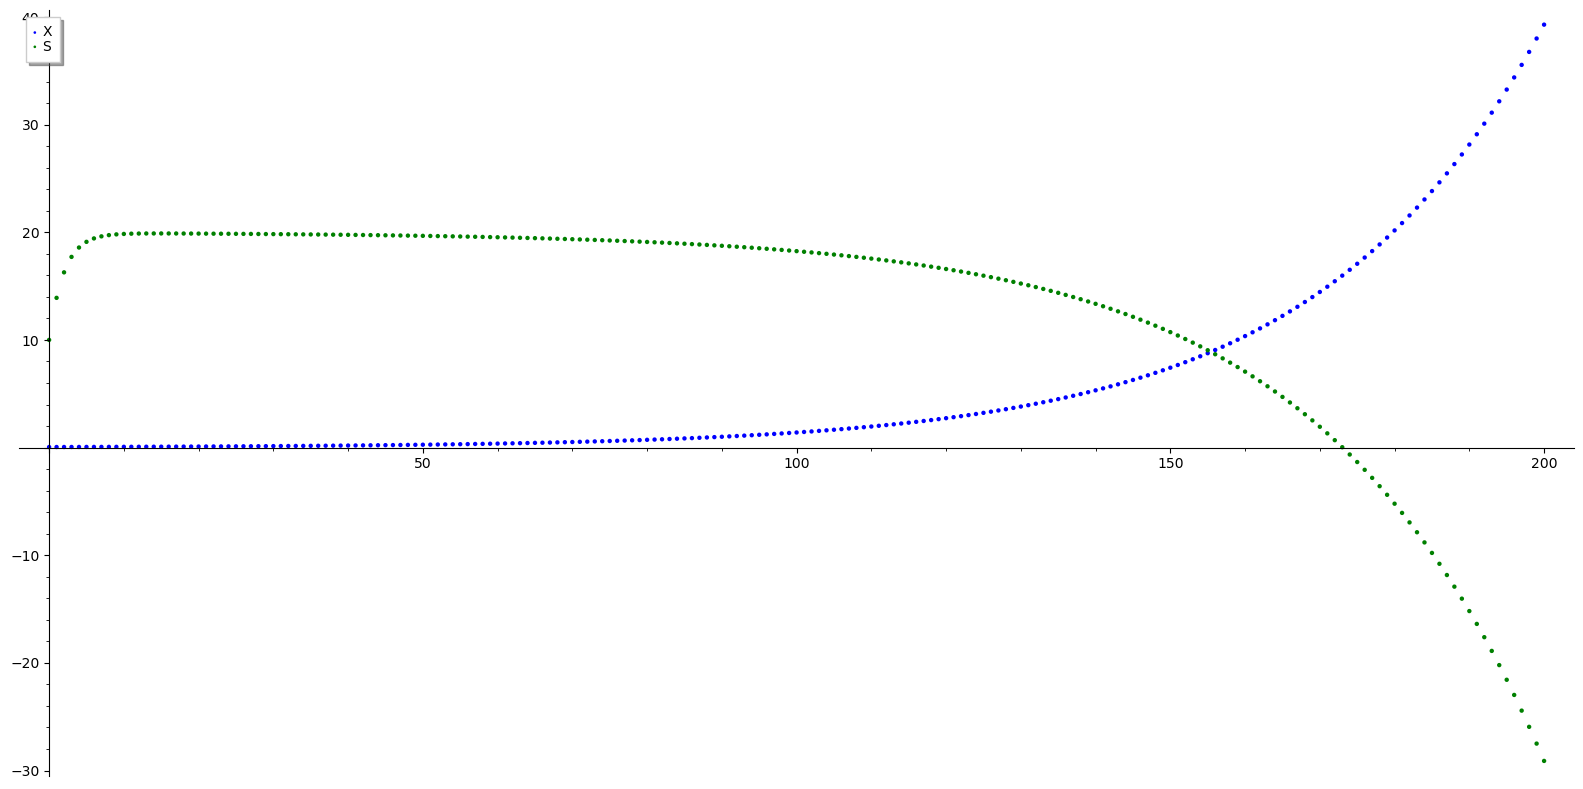

In [83]:
def plot_sol(sol):
    sim = get_sim_array(sol)
    P = list_plot(sim[:,0],legend_label='X')
    colors = ['blue','green']
    for i,var in enumerate(['S']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P, figsize=(16, 8))
plot_sol(T.solution)